In [2]:
# Code for Keras MLP
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
y_test.shape

(10000,)

In [6]:
x_train.shape

(60000, 28, 28)

Here ,600000 Hand Written Images and 28 , 28 are pixels

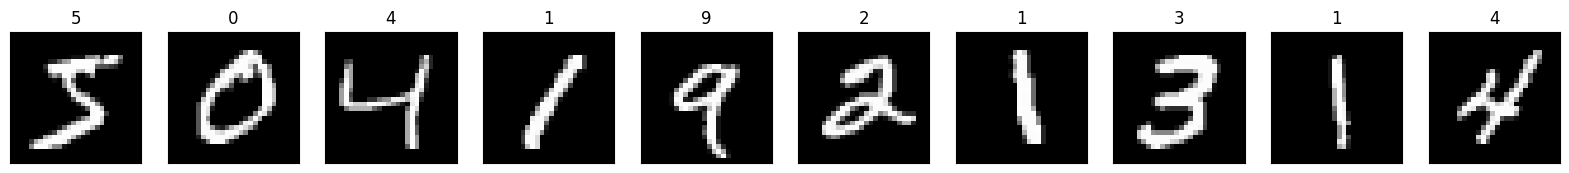

In [10]:
#Lets Plot the one image
fig,axes=plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i],cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

So, This is how the dataset look like .

In [11]:
#Lets convert in categorical 
#This code covert into 10 dimensional output
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [12]:
#Lets check how its look like after convert into categorical
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
#Lets check y_test
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
#Lets check the shape of the y_test
y_test.shape

(10000, 10)

In [15]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


# Flatten -> If yur have two dimension photo the flatten convert in 1 dimensional .

We are going to Flattening because we are using multilayer perceptron , So multilayer perceptron just take one input it does not take anything with take more then one dimension to consideration that is why we have to flatten

# Debne -> Fully Connected Layers

# Activation -. Which activation you want to use 

#Param -> Basically number of weights + biases we will be training 

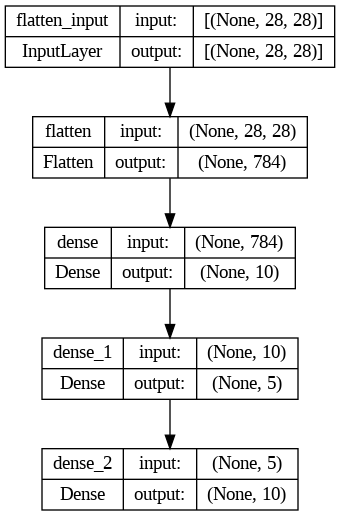

In [18]:
utils.plot_model(model, show_shapes=True)

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [28]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5154 - acc: 0.8615 - val_loss: 0.5100 - val_acc: 0.8653
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5434 - acc: 0.8558 - val_loss: 0.5196 - val_acc: 0.8613
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5118 - acc: 0.8640 - val_loss: 0.5069 - val_acc: 0.8771
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5218 - acc: 0.8578 - val_loss: 0.5249 - val_acc: 0.8649
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5218 - acc: 0.8638 - val_loss: 0.5430 - val_acc: 0.8546
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5275 - acc: 0.8600 - val_loss: 0.5592 - val_acc: 0.8491
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5112 - acc: 0.8652 - val_loss: 0.5052 - val_acc: 0.8618
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

# Batch Size -> Imput when enter , i never mentioned what kind of input will be going , So there are lots of way to sending the inputs . you can also send in batch , you cannto send 60000 data in one batch because your RAM not handle .

By default Batch Size = 32

# 1 Step Per Epochs -> How you will be going in with the input so you have batch size of 32..Since we have 60000 points and we have batch size of 32 data points that means one by one 32 data points going in finally when all the 60000 data points have gone in once we will complete one epoch.

What step per epoch means is how many time this happen before we complete 1 epoch = 60000/32=1875 -> Step per epoch

In [44]:
model.save('mnist_models_pranathi.h5')

Also , There are other neural network like CNN , that have actually been trained to understand image and the feature 

In [31]:
print(history.history)

{'loss': [0.5153945684432983, 0.5433824062347412, 0.511757493019104, 0.521835446357727, 0.521812379360199, 0.5274831652641296, 0.5112444162368774, 0.5161718726158142, 0.506598174571991, 0.498511403799057, 0.5099186897277832, 0.4910704791545868, 0.47959670424461365, 0.5088692903518677, 0.47716978192329407, 0.4897766709327698, 0.48764553666114807, 0.4876093566417694, 0.4824804365634918, 0.47223100066185], 'acc': [0.8614833354949951, 0.8557500243186951, 0.8640166521072388, 0.8577666878700256, 0.8638166785240173, 0.8600166440010071, 0.8651999831199646, 0.8612499833106995, 0.8600500226020813, 0.8654500246047974, 0.8586166501045227, 0.8689666390419006, 0.8707666397094727, 0.8625333309173584, 0.8733500242233276, 0.8690000176429749, 0.8704666495323181, 0.8729666471481323, 0.8775500059127808, 0.8774499893188477], 'val_loss': [0.5100226402282715, 0.5195943713188171, 0.5069274306297302, 0.5248885750770569, 0.542951762676239, 0.5591627955436707, 0.5052077770233154, 0.5407094359397888, 0.4843787252

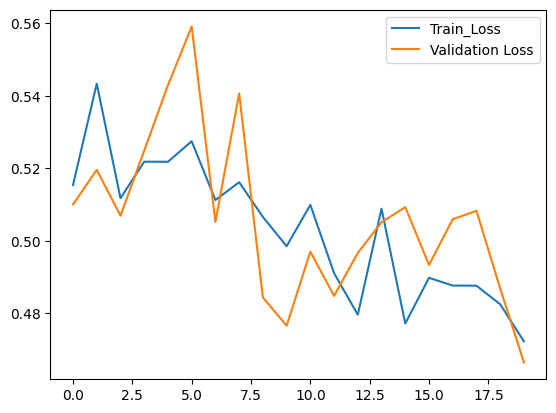

In [33]:
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

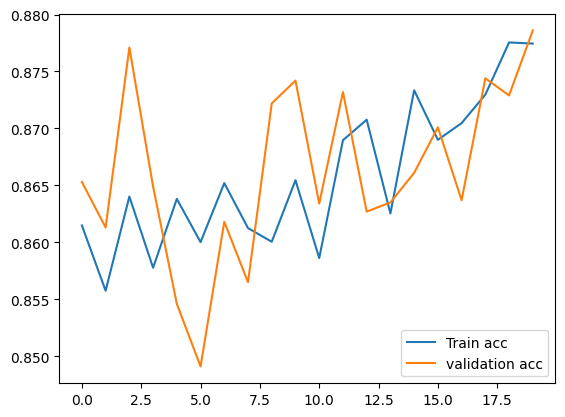

In [34]:
#Lets check for accuracy
plt.plot(history.history['acc'],label='Train acc')
plt.plot(history.history['val_acc'],label='validation acc')
plt.legend()

In [47]:
import tensorflow as tf

In [49]:
model = tf.keras.models.load_model('mnist_models_pranathi.h5')

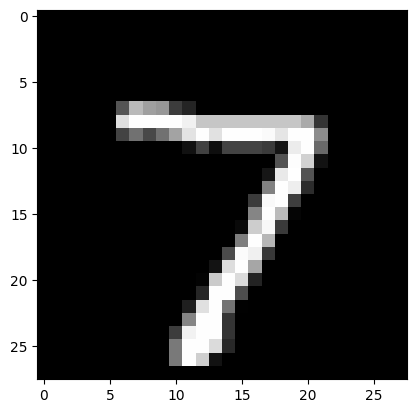

In [50]:
plt.imshow(x_test[0],cmap='gray')

When you are using plot then means its plot graph but we do not want to plot graph we want to show image thats why we are using imshow

In [52]:
import numpy as np

In [53]:
x=np.reshape(x_test[0],(1,28,28))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 93ms/step


7

In [ ]:
#Intern at pranathi
#Student of Datatrained
#Date -> 4-05-2023
#Time -> 11:24